#**Machine Learning Titanic Dataset Predict usando Python**

![alt text](https://img.vixdata.io/pd/webp-large/pt/sites/default/files/t/titanic-navio-teste-0818-1400x800.jpg)

O **naufrágio do Titanic**, em 1912, até hoje é um dos mais famosos da história. E uma das formas mais verdadeiras de falar do episódio é relembrando quem foram as vítimas e sobreviventes daquela viagem inaugural da embarcação, que colidiu com um iceberg e causou a morte de 1.500 pessoas.

A história mostra que, quando o Titanic bateu no iceberg e o naufrágio era iminente, os botes não eram suficientes para resgatar todos os passageiros (apenas para um terço deles e dos tripulantes).

Há versões que contam que alguns deles também saíram com assentos vazios, o que torna o episódio ainda mais intrigante. Por esse fator, iremos investigas usando **Machine Learning** usando a base de dados do **Titanic** que está dispponível no **Kaggle**.



## **Introdução ao Kaggle**

[Kaggle](`https://www.kaggle.com/`) é um site onde as pessoas criam algoritmos e competem contra profissionais de aprendizado de máquina em todo o mundo. Seu algoritmo vence a competição se for o mais preciso em um conjunto de dados específico. O Kaggle é uma maneira divertida de praticar suas habilidades de aprendizado de máquina.

Nesta lição, aprenderemos como competir nas competições do Kaggle. Nesta primeira seção introdutória, aprenderemos como:

- Aproxime-se de uma competição Kaggle
- Explore os dados da competição e aprenda sobre o tópico da competição
- Preparar dados para aprendizado de máquina
- Treine um modelo
- Meça a precisão do seu modelo
- Prepare e faça seu primeiro envio do Kaggle.

Kaggle criou uma série de competições projetadas para iniciantes. A mais popular dessas competições, e a que veremos, é prever quais [os passageiros sobreviveram ao naufrágio do Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic).

Nesta competição, temos um conjunto de dados de informações diferentes sobre passageiros a bordo do Titanic e vemos se podemos usar essas informações para prever se essas pessoas sobreviveram ou não. Antes de começarmos a olhar para esta competição específica, vamos dedicar um momento para entender como as competições do Kaggle funcionam.

Cada competição do Kaggle possui dois arquivos de dados principais com os quais você trabalhará - um **conjunto de treinamento** e um **conjunto de testes**.

O conjunto de treinamento contém dados que podemos usar para treinar nosso modelo. Ele possui várias colunas de recursos que contêm vários dados descritivos, além de uma coluna dos valores-alvo que estamos tentando prever: neste caso, **Sobrevivência**.

O conjunto de testes contém todas as mesmas colunas de recurso, mas está faltando a coluna de valor de destino. Além disso, o conjunto de testes geralmente possui menos observações (linhas) que o conjunto de treinamento.

<img width = "500" alt = "criando um repo" src = "https://drive.google.com/uc?export=view&id=1ESRBXN3nOU5H3_WxljfLiDBjfXdgzyfM">

Isso é útil porque queremos o máximo de dados possível para treinar nosso modelo. Depois de treinarmos nosso modelo no conjunto de treinamento, usaremos esse modelo para fazer previsões sobre os dados do conjunto de testes e enviar essas previsões ao Kaggle.

[Nesta competição](https://www.kaggle.com/c/titanic/data), os dois arquivos são nomeados **test.csv** e **train.csv**.

Vamos dar os seguintes passos:

1. Carregar bibliotecas
2. Obtenha dados, incluindo EDA
3. Limpe, prepare e manipule Dados (engenharia de recursos)
4. Modelagem (treinamento e teste)
5. Ajuste de Algoritmo
6. Criando um arquivo de envio

In [21]:
!pip install pandas_profiling==2.7.0

In [0]:

import numpy as np 
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
import lightgbm
from sklearn.model_selection import cross_val_score
import itertools
import pandas_profiling
from pandas_profiling import ProfileReport

%matplotlib inline




In [23]:
rawdata = pd.read_csv("titanic-publicleaderboard.csv")
rawdata.index = pd.to_datetime(rawdata.SubmissionDate).dt.normalize()
rawdata.head()

,TeamId,TeamName,SubmissionDate,Score
SubmissionDate,,,,
2012-10-18,26011,MoltenLava,2012-10-18 21:34:53,0.77511
2012-12-24,26011,MoltenLava,2012-12-24 02:18:04,0.77990
2012-12-28,31750,statIsFun,2012-12-28 06:31:01,0.76076
2012-12-28,31782,98074,2012-12-28 20:39:54,0.00000
2012-12-30,26011,MoltenLava,2012-12-30 00:06:06,0.78468


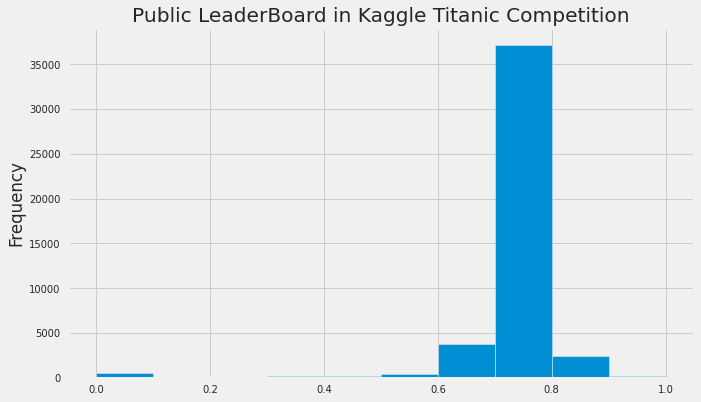

In [24]:
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(10,6))
rawdata.Score.plot(kind="hist",ax=ax)
plt.title("Public LeaderBoard in Kaggle Titanic Competition")
plt.show()

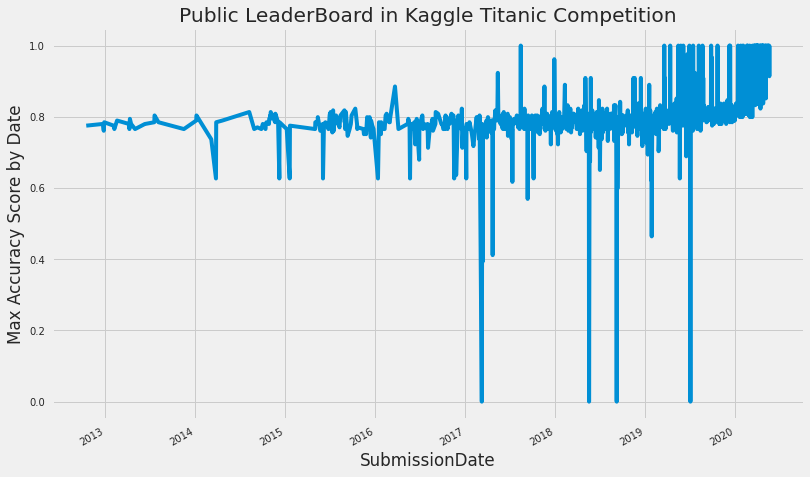

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
rawdata.groupby(by=rawdata.index)["Score"].max().plot(ax=ax)
plt.ylabel("Max Accuracy Score by Date")
plt.title("Public LeaderBoard in Kaggle Titanic Competition")
plt.show()

In [0]:
# lendo os datasets de treinamento e teste 
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# realizando uma cópia da base de dados teste do df para que seja realizad
submission = test_df.copy()

# combinar train e test dfs em 1 df de todos os dados
all_df = pd.concat([train_df, test_df], sort=False)


Os arquivos que lemos na tela anterior estão disponíveis na [página de dados da competição Titanic no Kaggle](https://www.kaggle.com/c/titanic/data). Essa página também possui um **dicionário de dados**, que explica as várias colunas que compõem o conjunto de dados. Abaixo estão as descrições contidas nesse dicionário de dados:

- **PassengerID** - Uma coluna adicionada pelo Kaggle para identificar cada linha e facilitar os envios
- **Survived** - Se o passageiro sobreviveu ou não e o valor que estamos prevendo (0 = Não, 1 = Sim)
- **Pclass** - A classe do bilhete que o passageiro comprou (1 = 1º, 2 = 2º, 3 = 3º)
- **Sex** - O sexo do passageiro
- **Age** - A idade do passageiro em anos
- **SibSp** - O número de irmãos ou cônjuges que o passageiro tinha a bordo do Titanic
- **Parch** - O número de pais ou filhos que o passageiro tinha a bordo do Titanic
- **Ticket** - O número do bilhete do passageiro
- **Fare** - A tarifa paga pelo passageiro
- **Cabin** - O número da cabine do passageiro
- **Embarked** - O porto em que o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = Southampton)

A página de dados no Kaggle tem algumas notas adicionais sobre algumas das colunas. Sempre vale a pena explorar isso em detalhes para obter um entendimento completo dos dados.

As primeiras 5 linhas dos dados estão abaixo:

In [27]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [32]:


# Defina a função para inspecionar os quadros de dados. Imprime as primeiras linhas, determina o tamanho / formato do quadro de dados,
# mostra estatísticas descritivas, mostra tipos de dados, mostra dados ausentes ou incompletos, verifique se há dados duplicados.

def inspect_df(df):
    print('Header:')
    print('{}'.format(df.head()))
    print()
    print('Shape: {}'.format(df.shape))
    print()
    print('Statistics:')
    print('{}'.format(df.describe()))
    print()
    print('Info:')
    print('{}'.format(df.info()))
    
# função para visualizar as chamadas

inspect_df(all_df)

Header:
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1       0.0       3  ...   7.2500   NaN         S
1            2       1.0       1  ...  71.2833   C85         C
2            3       1.0       3  ...   7.9250   NaN         S
3            4       1.0       1  ...  53.1000  C123         S
4            5       0.0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

Shape: (1309, 12)

Statistics:
       PassengerId    Survived  ...        Parch         Fare
count  1309.000000  891.000000  ...  1309.000000  1308.000000
mean    655.000000    0.383838  ...     0.385027    33.295479
std     378.020061    0.486592  ...     0.865560    51.758668
min       1.000000    0.000000  ...     0.000000     0.000000
25%     328.000000    0.000000  ...     0.000000     7.895800
50%     655.000000    0.000000  ...     0.000000    14.454200
75%     982.000000    1.000000  ...     0.000000    31.275000
max    1309.000000    1.000000  ...     9.000000   512.329200



In [33]:
# veja as proporções de passageiros por Pclass
all_df.Pclass.value_counts(normalize=True, sort=False)

1    0.246753
2    0.211612
3    0.541635
Name: Pclass, dtype: float64

In [34]:
# veja as proporções de passageiros por Sex

all_df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [35]:

# inspeciona valores nulos para Embarked

all_df[all_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Looked up Mrs. Stone and Miss Icard online, they boarded in Southampton.

In [0]:
# preencha os valores ausentes de Embarked com informações encontradas on-line
all_df.loc[[61, 829], ['Embarked']] = 'S'

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


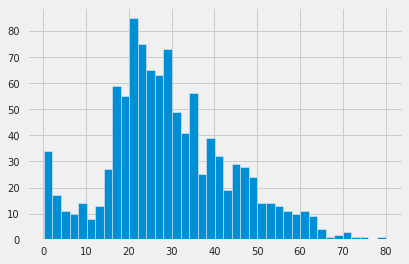

In [37]:
# plot histogram para Ages
plt.hist(data = all_df, x = 'Age', bins = 40);

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


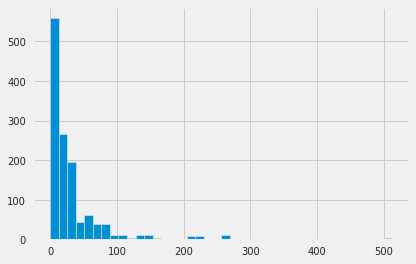

In [38]:
# plot histograma para Fare
plt.hist(data = all_df, x = 'Fare', bins = 40);

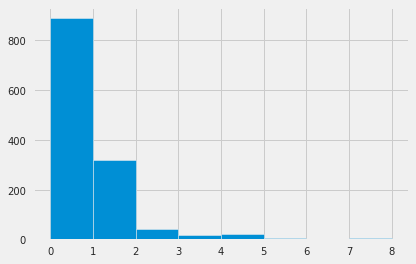

In [39]:

# histograma de  de siblings e spouses

plt.hist(data = all_df, x = 'SibSp', bins = 8);

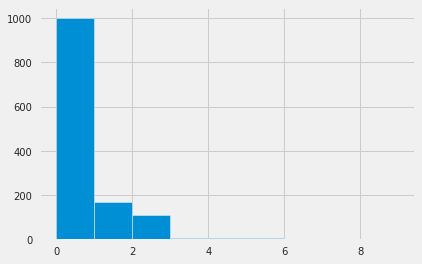

In [40]:

# histograma para parents e children

plt.hist(data = all_df, x = 'Parch', bins = 9);

In [41]:

# inspecionar colunas e valores ausentes novamente
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 172.9+ KB


In [42]:

# encontrar passageiros com dados de tarifa ausentes
all_df[all_df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [43]:

# obter fare média de cada Pclass
all_df.Fare.groupby(all_df.Pclass).mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [0]:
# preencha o valor da tarifa nan com média arredondada para a classe 3
all_df.loc[152, ['Fare']] = 13

In [0]:

# preencha os valores ausentes para as idades com o valor médio da idade para cada passageiro Classe e sexo
all_df.Age = all_df.Age.groupby([all_df.Pclass, all_df.Sex]).transform(lambda x: x.fillna(x.mean()))

In [46]:

# Extraia títulos de nomes e crie uma nova coluna de título e obtenha a taxa de sobrevivência de cada título
all_df['Title'] = all_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
all_df.Survived.groupby(all_df.Title).mean()

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

In [47]:

# obter contagens de valor para ocorrências de título

all_df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Major         2
Mlle          2
Don           1
Sir           1
Countess      1
Mme           1
Dona          1
Capt          1
Lady          1
Jonkheer      1
Name: Title, dtype: int64

In [48]:

# Substitua títulos incomuns por valores mais comuns e visualize novas ocorrências

all_df.Title = all_df.Title.replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Don', 'Sir', 'Jonkheer'], 'Mr')
all_df.Title = all_df.Title.replace(['Ms', 'Mlle'], 'Miss')
all_df.Title = all_df.Title.replace(['Mme', 'Lady', 'Countess', 'Dona'], 'Mrs')
all_df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [49]:

# combine sibsp e parch em uma coluna da family
all_df['Fam'] = all_df.SibSp + all_df.Parch
# criar coluna de frequência do ticket para o número de ocorrências do número do ticket
all_df['Ticket_Frequency'] = all_df.groupby('Ticket')['Ticket'].transform('count')
    
# cria a coluna para solo vs viajar com a family
all_df.loc[all_df['Fam'] == 0, 'Solo'] = 1
all_df.loc[all_df['Ticket_Frequency'] == 1, 'Solo'] = 1
all_df.Solo = all_df.Solo.fillna(0)
       
# bin tarifa para 9 quantis e codificar como ordinal
all_df['Fare'] = pd.qcut(all_df.Fare, q=9, labels=np.arange(1,10))
    
# bin age para 10 quantis e codifique como ordinal
all_df['Age'] = pd.qcut(all_df.Age, q=10, labels=np.arange(1,11))
    
# one-hot codificar coluna de sexo e colocar maiúsculas em colunas de sexo para obter consistência
all_df = pd.concat([all_df, pd.get_dummies(all_df.Sex)], axis=1)
all_df.rename(columns={'male':'Male', 'female':'Female'}, inplace=True)
    
#coluna Embarked de codificação em one-hot
all_df = pd.concat([all_df, pd.get_dummies(all_df.Embarked, prefix='Embarked')], axis=1)
    
# coluna de título de codificação em one-hot
all_df = pd.concat([all_df, pd.get_dummies(all_df.Title)], axis=1)
    
# remove colunas indesejadas (name, sex, cabin, embarked and title foram substituídos por uma  one hot encoding, ticket substituído pela frequency do ticket,
# cabin possui muitos valores ausentes, sibsp e parch substituídos por colunas fam e solo)
all_df = all_df.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Embarked', 'Title'])
    
# inspecionar colunas e número de valores para df resultante
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       1309 non-null   int64   
 1   Survived          891 non-null    float64 
 2   Pclass            1309 non-null   int64   
 3   Age               1309 non-null   category
 4   Fare              1309 non-null   category
 5   Fam               1309 non-null   int64   
 6   Ticket_Frequency  1309 non-null   int64   
 7   Solo              1309 non-null   float64 
 8   Female            1309 non-null   uint8   
 9   Male              1309 non-null   uint8   
 10  Embarked_C        1309 non-null   uint8   
 11  Embarked_Q        1309 non-null   uint8   
 12  Embarked_S        1309 non-null   uint8   
 13  Master            1309 non-null   uint8   
 14  Miss              1309 non-null   uint8   
 15  Mr                1309 non-null   uint8   
 16  Mrs               1309 no

In [50]:

# inspecionar as rates de sobrevivência quanto ao número de membros da família a bordo

all_df.Survived.groupby(all_df.Fam).mean()

Fam
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

In [51]:

# obter contagens de valor

all_df.Fam = pd.cut(all_df.Fam, bins=[0, 1, 4, 7, 11], include_lowest=True, right=False, labels=[1, 2, 3, 4])
all_df.Fam.value_counts()

1    790
2    437
3     63
4     19
Name: Fam, dtype: int64

In [52]:

# inspecionar a rate de survival para o número de pessoas que viajam em grupo

all_df.Survived.groupby(all_df.Ticket_Frequency).mean()

Ticket_Frequency
1     0.270270
2     0.513812
3     0.653465
4     0.727273
5     0.333333
6     0.210526
7     0.208333
8     0.384615
11    0.000000
Name: Survived, dtype: float64

In [53]:

# bin para valores da coluna de frequência do ticket e obter contagens de valores

all_df.Ticket_Frequency = pd.cut(all_df.Ticket_Frequency, bins=[0, 2, 5, 9, 12], right=False, labels=[1, 2, 3, 4])
all_df.Ticket_Frequency.value_counts()

1    713
2    475
3    110
4     11
Name: Ticket_Frequency, dtype: int64

In [54]:

# faça uma lista de todas as colunas e veja-a

cols = list(all_df)
cols

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'Fare',
 'Fam',
 'Ticket_Frequency',
 'Solo',
 'Female',
 'Male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Master',
 'Miss',
 'Mr',
 'Mrs']

In [0]:

# use o MinMaxScaler para dimensionar todas as colunas de recursos no intervalo de 0 a 1

scaler = MinMaxScaler()
all_df[cols] = scaler.fit_transform(all_df[cols])

In [0]:

# criar matriz de etiquetas sobreviventes (treinamento), soltar a coluna sobrevivente de all_df, dividir all_df em recursos (treinamento) e test_df e criar matriz de nomes de colunas de recursos

labels = all_df.loc[:890, 'Survived']
all_df = all_df.drop(columns = 'Survived')
features = all_df.iloc[:891]
test_df = all_df.iloc[891:]
feat_names = features.columns.values

In [0]:

# use SelectKBest para restringir os principais recursos e use o resultado para transformar os recursos de trem e teste dfs
k = SelectKBest(k=11)
k.fit(features, labels)
k_scores = (k.scores_)
features = k.transform(features)
test_df = k.transform(test_df)

In [58]:

# cria o df para mostrar pontuações para todos os recursos e imprimir

feat_scores = pd.DataFrame()
feat_scores['Feature'] = feat_names
feat_scores['Score'] = k_scores
feat_scores

,Feature,Score
0,PassengerId,0.022285
1,Pclass,115.031272
2,Age,0.118749
3,Fare,108.327062
4,Fam,6.313788
5,Ticket_Frequency,17.149390
6,Solo,47.368609
7,Female,372.405724
8,Male,372.405724
9,Embarked_C,25.895987


In [0]:

# dividir dados de treinamento em subconjuntos de treinamento e teste para validação

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=3)

In [0]:
# setup base classifiers
# setup classificadores básicos

gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
ab = AdaBoostClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression(solver='liblinear')
kn = KNeighborsClassifier()
svc = SVC(gamma='auto', probability=True)
gnb = GaussianNB()

In [61]:

# obter classificadores básicos de treinamento e obter pontuações de validação inicial

gb.fit(features_train, labels_train)
print('GB Score:', gb.score(features_test, labels_test))
rf.fit(features_train, labels_train)
print('RF Score:', rf.score(features_test, labels_test))
et.fit(features_train, labels_train)
print('ET Score:', et.score(features_test, labels_test))
ab.fit(features_train, labels_train)
print('AB Score:', ab.score(features_test, labels_test))
dt.fit(features_train, labels_train)
print('DT Score:', dt.score(features_test, labels_test))
lr.fit(features_train, labels_train)
print('LR Score:', lr.score(features_test, labels_test))
kn.fit(features_train, labels_train)
print('KN Score:', kn.score(features_test, labels_test))
svc.fit(features_train, labels_train)
print('SVC Score:', svc.score(features_test, labels_test))
gnb.fit(features_train, labels_train)
print('GNB Score:', gnb.score(features_test, labels_test))

GB Score: 0.8156424581005587
RF Score: 0.8212290502793296
ET Score: 0.8100558659217877
AB Score: 0.8044692737430168
DT Score: 0.8156424581005587
LR Score: 0.8212290502793296
KN Score: 0.8044692737430168
SVC Score: 0.8044692737430168
GNB Score: 0.7821229050279329


In [62]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = gb
params = {'n_estimators': (10, 25, 50, 100), 'learning_rate': (0.01, 0.1, 0.5, 1, 5, 10)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
gb = clf.best_estimator_

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100}
Best Score: 0.8286713286713286


In [63]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = rf
params = {'n_estimators': (10, 25, 50, 100), 'min_samples_split': (2, 3, 4, 5, 10), 'min_samples_leaf': (1, 2, 3, 4, 5)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
rf = clf.best_estimator_

Best Parameters: {'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 25}
Best Score: 0.8301388752092975


In [64]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = et
params = {'n_estimators': (10, 25, 50, 100), 'min_samples_split': (2, 3, 4, 5, 10), 'min_samples_leaf': (1, 2, 3, 4, 5)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
et = clf.best_estimator_

Best Parameters: {'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 50}
Best Score: 0.8287107258938246


In [65]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = ab
params = {'n_estimators': (10, 25, 50, 100), 'learning_rate': (0.01, 0.1, 0.5, 1, 5, 10)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
ab = clf.best_estimator_

Best Parameters: {'learning_rate': 1, 'n_estimators': 10}
Best Score: 0.8146262188515709


In [66]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = dt
params = {'min_samples_split': (2, 3, 4, 5, 10), 'min_samples_leaf': (1, 2, 3, 4, 5)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
dt = clf.best_estimator_

Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 4}
Best Score: 0.8188712695754949


In [67]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = lr
params = {'penalty': ('l1', 'l2'), 'C': (0.01, 0.1, 0.5, 1, 5, 10), 'max_iter': (100, 500)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
lr = clf.best_estimator_

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
Best Score: 0.8188417216586231


In [68]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = kn
params = {'n_neighbors': (2, 3, 4, 5, 10, 20)}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
kn = clf.best_estimator_

Best Parameters: {'n_neighbors': 10}
Best Score: 0.8118388653599922


In [69]:

# use gridsearch para ajustar os hiperparâmetros do classificador base

alg = svc
params = {'C': (0.01, 0.1, 0.5, 1, 5, 10), 'kernel': ('linear', 'poly', 'rbf', 'sigmoid')}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features_train, labels_train)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
svc = clf.best_estimator_

Best Parameters: {'C': 10, 'kernel': 'poly'}
Best Score: 0.8244558258642766


In [70]:
# treinar novamente os classificadores básicos e obter pontuações de validação

gb.fit(features_train, labels_train)
print('GB Score:', gb.score(features_test, labels_test))
rf.fit(features_train, labels_train)
print('RF Score:', rf.score(features_test, labels_test))
et.fit(features_train, labels_train)
print('ET Score:', et.score(features_test, labels_test))
ab.fit(features_train, labels_train)
print('AB Score:', ab.score(features_test, labels_test))
dt.fit(features_train, labels_train)
print('DT Score:', dt.score(features_test, labels_test))
lr.fit(features_train, labels_train)
print('LR Score:', lr.score(features_test, labels_test))
kn.fit(features_train, labels_train)
print('KN Score:', kn.score(features_test, labels_test))
svc.fit(features_train, labels_train)
print('SVC Score:', svc.score(features_test, labels_test))
gnb.fit(features_train, labels_train)
print('GNB Score:', gnb.score(features_test, labels_test))

GB Score: 0.8379888268156425
RF Score: 0.8324022346368715
ET Score: 0.8324022346368715
AB Score: 0.7988826815642458
DT Score: 0.8156424581005587
LR Score: 0.8212290502793296
KN Score: 0.8324022346368715
SVC Score: 0.8379888268156425
GNB Score: 0.7821229050279329


In [71]:
# setup voting classifier and get initial cross val score
# setup classificador de votação e obtenha a pontuação inicial cruzada

vote = VotingClassifier(estimators=[('gb',gb), ('rf',rf), ('et',et), ('ab',ab), ('dt',dt), ('lr',lr), ('kn',kn), ('svc',svc), ('gnb',gnb)], voting='soft')
vote.fit(features, labels)
cross_val_score(vote, features, labels, cv=5, scoring='accuracy').mean()

0.827154604230745

In [72]:
# retrain voting classifier and get validation score
# treinar novamente o classificador de votação e obter pontuação de validação

vote.fit(features_train, labels_train)
print('Voting Score:', vote.score(features_test, labels_test))

Voting Score: 0.8324022346368715


In [0]:
# use itertools combinations to make list of tuples of all possible different combinations of classifiers
# use itertools combinações para criar uma lista de tuplas de todas as combinações diferentes possíveis de classificadores

clfs = [('gb',gb), ('rf',rf), ('et',et), ('ab',ab), ('dt',dt), ('lr',lr), ('kn',kn), ('svc',svc), ('gnb',gnb)]
combs = []

for i in range(2, len(clfs)+1):
    comb = [list(x) for x in itertools.combinations(clfs, i)]
    combs.extend(comb)

In [74]:
# Tune voting classifier to use best combination of base classifiers
# Ajuste o classificador de votação para usar a melhor combinação de classificadores de base

alg = vote
params = {'estimators': combs}
clf = GridSearchCV(alg, params, cv = 5, scoring = 'accuracy', n_jobs = -1)
clf.fit(features, labels)
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
vote = clf.best_estimator_

Best Parameters: {'estimators': [('gb', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)), ('ab', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=10, random_state=None))]}
Best Score: 0.8349883874207521


In [75]:
# retrain voting classifier and get validation score
# treinar novamente o classificador de votação e obter pontuação de validação

vote.fit(features_train, labels_train)
print('Voting Score:', vote.score(features_test, labels_test))

Voting Score: 0.8379888268156425


In [0]:
# retrain voting classifier with full train set, use to make probability predictions and make df of probs, set threshold for probablities and use to convert probs to predictions
# treinar novamente o classificador de votação com conjunto completo de train, use para fazer previsões de probabilidade e faça df de probs, defina o limite de probabilidades e use para converter probs em previsões
vote.fit(features, labels)
pred_prob = pd.DataFrame(vote.predict_proba(test_df))
threshold = 0.55
y_pred = pred_prob.applymap(lambda x: 1 if x>threshold else 0)

In [0]:
# add predictions submission df as survived column, drop all columns but passenger ID and survived, write submission to csv without index to generate submission file
# adicionar predições submissão df como coluna sobrevivida, soltar todas as colunas, exceto o ID do passageiro e sobreviver, gravar a submissão em csv sem índice para gerar o arquivo de submissão
submission['Survived'] = y_pred[1].astype(int)
submission = submission[['PassengerId', 'Survived']]
submission.to_csv('submission.csv', index=False)

In [0]:
files.download('submission.csv') 

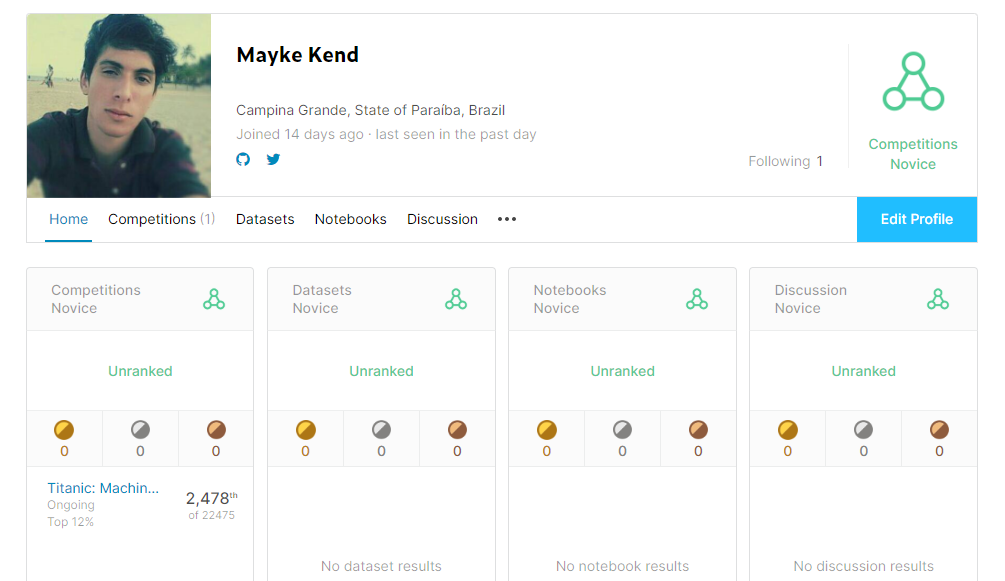

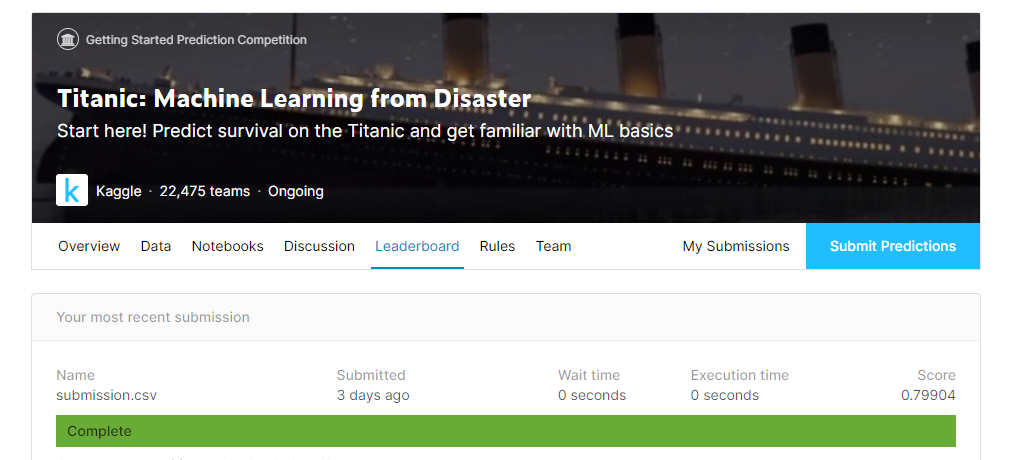

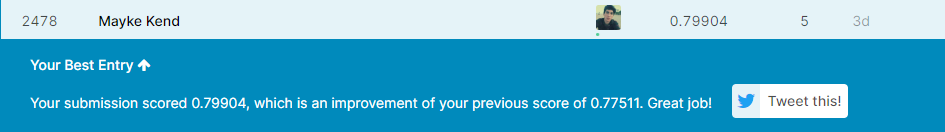